SAHIL KUMAR

TASK 2: To Explore Supervised Machine Learning.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

What will be the predicted score if a student study for 9.25 hrs in a day ?

In [4]:
# Importing required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [7]:
# Reading data from the given link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print('Data Imported Successfully')
data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(25, 2)

In [14]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [16]:
data.style

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


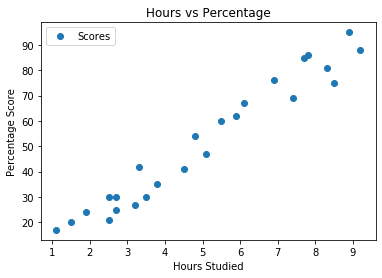

In [17]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [18]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [20]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


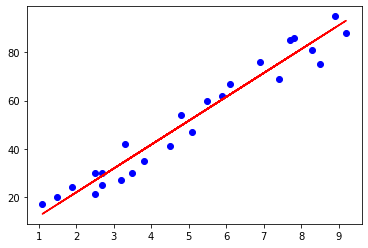

In [21]:
# Plotting the regression line

line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'b')
plt.plot(X, line, color = 'r');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [22]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted


df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df 

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
# You can also test with your own data

hours = 9.25
pred_score = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

     

Mean Absolute Error: 4.183859899002975
